# Reinforcement Learning - Toy examples with Gym

## FrozenLake

In this Notebook, we use functions (from module TD in auxModules) that implement $SARSA$ and $Q-Learning$ methods to solve the FrozenLake environments (https://gym.openai.com/envs/FrozenLake-v0/), using and comparing different policies for exploration. Note that basic FrozenLake is a stochastic envivonment since, as mentioned in the documentation, "the ice is slippery, so you won't always move in the direction you intend". We create deterministic environments calling function register from gym.envs.registration.

Both algorithms update a tabular estimate of the $Q-function$ using a following update rule:
* $SARSA$ algorithm is an on-policy method using:
$$Q_{t+1}(s_t,a_t) \leftarrow Q_t(s_t,a_t) + \alpha (r_t + \gamma Q_t(s_{t+1}, a_{t+1}) - Q_t(s_t,a_t))$$

* $Q-Learning$ algorithm is an off-policy method using:
$$Q_{t+1}(s_t,a_t) \leftarrow Q_t(s_t,a_t) + \alpha (r_t + \gamma \max_b Q_t(s_{t+1}, b) - Q_t(s_t,a_t))$$

For exploration, we will compare performances between:
* $\epsilon$-greedy policy with a fixed $\epsilon$.
* $\epsilon$-greedy policy with a decaying $\epsilon$.
* softmax exploration assigning a probability for an action to be
performed according to the following rule:
$$P(a_i \vert s) = \frac{e^{\frac{1}{\tau}Q(s,a_j)}}{\sum_j e^{\frac{1}{\tau}Q(s,a_j)}}$$

In [1]:
import sys
sys.path.append("../") # go to parent dir
import matplotlib.pyplot as plt
%matplotlib inline
from auxModules.TD import *
from gym.envs.registration import register

## Deterministic 4x4 FrozenLake

In [2]:
register(
    id='FrozenLakeNotSlippery4x4-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '4x4', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.78, # optimum = .8196
)

In [3]:
compareMethods("FrozenLakeNotSlippery4x4-v0", nEpisodeAccuracy=1, threshold=0.99, nEpisodeMax=2000)

c:\environments\drl_env\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


epsilon-greedy with fixed epsilon


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:25<00:00,  5.18s/it]


epsilon-greedy with decreasing epsilon


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:18<00:00,  6.31s/it]


Softmax


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [01:15<00:00, 17.14s/it]


## Deterministic 8x8 FrozenLake

In [3]:
register(
    id='FrozenLakeNotSlippery8x8-v0',
    entry_point='gym.envs.toy_text:FrozenLakeEnv',
    kwargs={'map_name' : '8x8', 'is_slippery': False},
    max_episode_steps=100,
    reward_threshold=0.78, # optimum = .8196
)

In [ ]:
compareMethods("FrozenLakeNotSlippery8x8-v0", nEpisodeAccuracy=1, threshold=0.99, nEpisodeMax=1000)

c:\environments\drl_env\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


epsilon-greedy with fixed epsilon


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:00<00:00, 24.22s/it]


epsilon-greedy with decreasing epsilon


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [01:32<00:00, 30.89s/it]


Softmax


100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 4/4 [03:03<00:00, 38.77s/it]


## Stochastic 4x4 FrozenLake

In [ ]:
compareMethods("FrozenLake-v0", nEpisodeAccuracy=1000, threshold=0.8, nEpisodeMax=10000)

epsilon-greedy with fixed epsilon


 80%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▊                             | 4/5 [03:17<00:50, 50.27s/it]

## Stochastic 8x8 FrozenLake

In [ ]:
compareMethods("FrozenLake8x8-v0", nEpisodeAccuracy=1000, threshold=0.8, nEpisodeMax=10000)

In [3]:
env = gym.make("FrozenLake-v0")

c:\environments\drl_env\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Text(0.5, 1.0, '(QL) Softmax strategy')

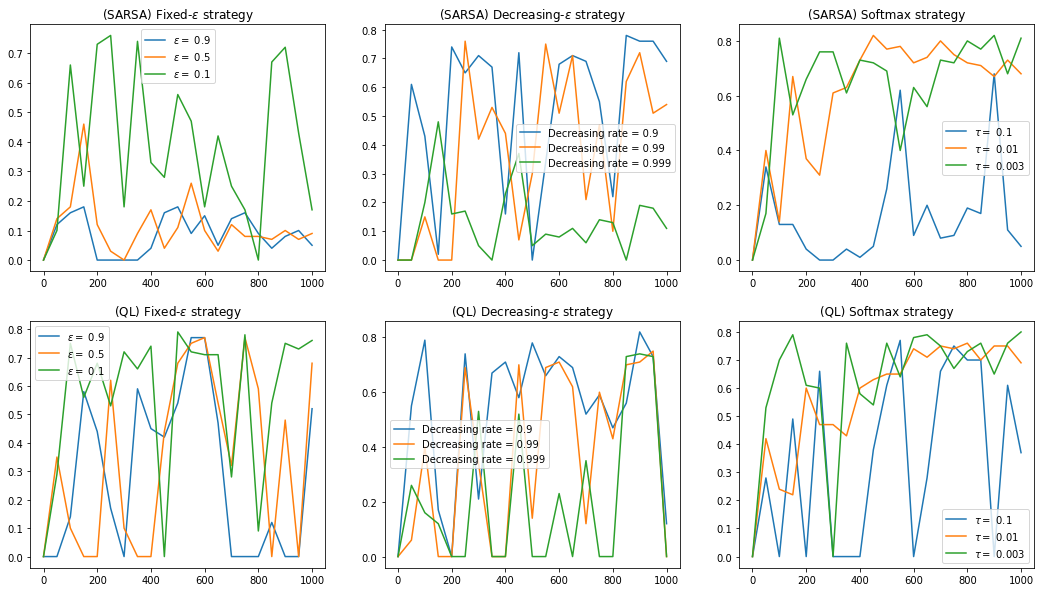

In [6]:
nEp = 1000

plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
Eps = [0.9,0.5,0.1]
for eps in Eps:
    q, a = SARSA(env, nEpisode=nEp, epsilon0=eps, decreaseRate=1, softmax=False,
          tau=0.01)
    plt.plot(np.arange(len(a))*50, a, label = "$\epsilon =$ {}".format(eps))

plt.legend()
plt.title("(SARSA) Fixed-$\epsilon$ strategy")

plt.subplot(2,3,2)
DR = [0.9,0.99,0.999]
for dr in DR:
    q, a = SARSA(env, nEpisode=nEp, epsilon0=0.9, decreaseRate=dr, softmax=False,
          tau=0.01)
    plt.plot(np.arange(len(a))*50, a, label = "Decreasing rate = {}".format(dr))

plt.legend()
plt.title("(SARSA) Decreasing-$\epsilon$ strategy")

plt.subplot(2,3,3)
Tau = [0.1,0.01,0.003]
for tau in Tau:
    q, a = SARSA(env, nEpisode=nEp, epsilon0=0.9, decreaseRate=1, softmax=True,
          tau=tau)
    plt.plot(np.arange(len(a))*50, a, label = "$\\tau =$ {}".format(tau))

plt.legend()
plt.title("(SARSA) Softmax strategy")

plt.subplot(2,3,4)
Eps = [0.9,0.5,0.1]
for eps in Eps:
    q, a = QLearning(env, nEpisode=nEp, epsilon0=eps, decreaseRate=1, softmax=False,
          tau=0.01)
    plt.plot(np.arange(len(a))*50, a, label = "$\epsilon =$ {}".format(eps))

plt.legend()
plt.title("(QL) Fixed-$\epsilon$ strategy")

plt.subplot(2,3,5)
DR = [0.9,0.99,0.999]
for dr in DR:
    q, a = QLearning(env, nEpisode=nEp, epsilon0=0.9, decreaseRate=dr, softmax=False,
          tau=0.01)
    plt.plot(np.arange(len(a))*50, a, label = "Decreasing rate = {}".format(dr))

plt.legend()
plt.title("(QL) Decreasing-$\epsilon$ strategy")

plt.subplot(2,3,6)
Tau = [0.1,0.01,0.003]
for tau in Tau:
    q, a = QLearning(env, nEpisode=nEp, epsilon0=0.9, decreaseRate=1, softmax=True,
          tau=tau)
    plt.plot(np.arange(len(a))*50, a, label = "$\\tau =$ {}".format(tau))

plt.legend()
plt.title("(QL) Softmax strategy")

In [53]:
env = gym.make("FrozenLakeNotSlippery8x8-v0")

Text(0.5, 1.0, '(QL) Softmax strategy')

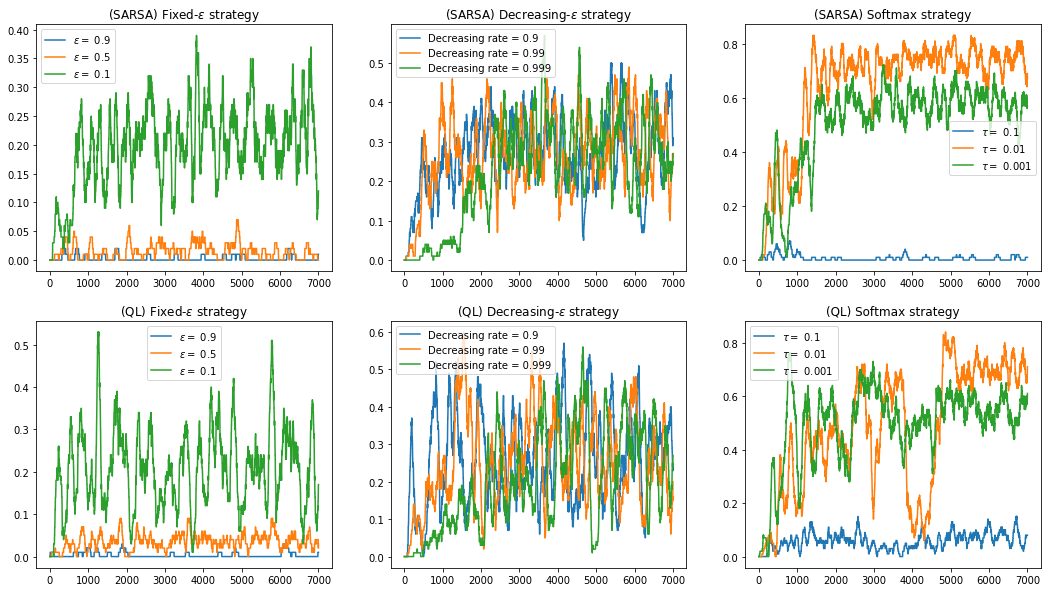

In [62]:
nEp = 7000

plt.figure(figsize=(18,10))

plt.subplot(2,3,1)
Eps = [0.9,0.5,0.1]
for eps in Eps:
    q, a = SARSA(env, nEpisode=nEp, epsilon0=eps, decreaseRate=1, softmax=False,
          tau=0.01)
    plt.plot(a, label = "$\epsilon =$ {}".format(eps))

plt.legend()
plt.title("(SARSA) Fixed-$\epsilon$ strategy")

plt.subplot(2,3,2)
DR = [0.9,0.99,0.999]
for dr in DR:
    q, a = SARSA(env, nEpisode=nEp, epsilon0=0.9, decreaseRate=dr, softmax=False,
          tau=0.01)
    plt.plot(a, label = "Decreasing rate = {}".format(dr))

plt.legend()
plt.title("(SARSA) Decreasing-$\epsilon$ strategy")

plt.subplot(2,3,3)
Tau = [0.1,0.01,0.001]
for tau in Tau:
    q, a = SARSA(env, nEpisode=nEp, epsilon0=0.9, decreaseRate=1, softmax=True,
          tau=tau)
    plt.plot(a, label = "$\\tau =$ {}".format(tau))

plt.legend()
plt.title("(SARSA) Softmax strategy")

plt.subplot(2,3,4)
Eps = [0.9,0.5,0.1]
for eps in Eps:
    q, a = QLearning(env, nEpisode=nEp, epsilon0=eps, decreaseRate=1, softmax=False,
          tau=0.01)
    plt.plot(a, label = "$\epsilon =$ {}".format(eps))

plt.legend()
plt.title("(QL) Fixed-$\epsilon$ strategy")

plt.subplot(2,3,5)
DR = [0.9,0.99,0.999]
for dr in DR:
    q, a = QLearning(env, nEpisode=nEp, epsilon0=0.9, decreaseRate=dr, softmax=False,
          tau=0.01)
    plt.plot(a, label = "Decreasing rate = {}".format(dr))

plt.legend()
plt.title("(QL) Decreasing-$\epsilon$ strategy")

plt.subplot(2,3,6)
Tau = [0.1,0.01,0.001]
for tau in Tau:
    q, a = QLearning(env, nEpisode=nEp, epsilon0=0.9, decreaseRate=1, softmax=True,
          tau=tau)
    plt.plot(a, label = "$\\tau =$ {}".format(tau))

plt.legend()
plt.title("(QL) Softmax strategy")

In [3]:
env = gym.make("FrozenLake-v0")

c:\environments\drl_env\lib\site-packages\gym\envs\registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


Text(0.5, 1.0, '(QL) Softmax strategy')

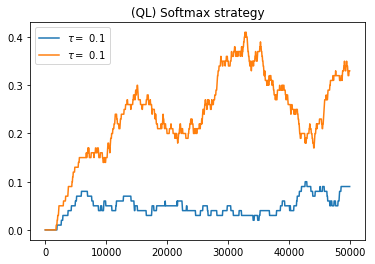

In [4]:
nEp = 1000

plt.figure()


Tau = [0.1]
for tau in Tau:
    q, a = SARSA(env, nEpisode=nEp, epsilon0=0.9, decreaseRate=1, softmax=True,
          tau=tau)
    plt.plot(np.arange(len(a))*50, a, label = "$\\tau =$ {}".format(tau))

plt.legend()
plt.title("(SARSA) Softmax strategy")


for tau in Tau:
    q, a = QLearning(env, nEpisode=nEp, epsilon0=0.9, decreaseRate=1, softmax=True,
          tau=tau)
    plt.plot(np.arange(len(a))*50, a, label = "$\\tau =$ {}".format(tau))

plt.legend()
plt.title("(QL) Softmax strategy")